In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load data
variable_definitions = pd.read_csv('VariableDefinitions.csv')
data = pd.read_csv('Data.csv')

# Preview the datasets
display(variable_definitions.head())
display(data.head())


,Variable,Definition
0,CustomerId,Unique number identifying the customer on plat...
1,TransactionStartTime,Transaction start time
2,Value,Value of transaction
3,Amount,Value of Transaction with charges
4,TransactionId,Unique transaction identifier on platform


,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

In [2]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values (example: forward fill, or we can drop if appropriate)
data.fillna(method='ffill', inplace=True)



CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64


In [3]:
data.isna().sum()

CustomerId                0
TransactionStartTime      0
Value                     0
Amount                    0
TransactionId             0
BatchId                   0
SubscriptionId            0
CurrencyCode              0
CountryCode               0
ProviderId                0
ProductId                 0
ProductCategory           0
ChannelId                 0
TransactionStatus         0
IssuedDateLoan            9
AmountLoan                9
Currency                  9
LoanId                    9
PaidOnDate                9
IsFinalPayBack            9
InvestorId                9
DueDate                   9
LoanApplicationId        15
PayBackId                 9
ThirdPartyId              9
IsThirdPartyConfirmed     9
IsDefaulted               9
dtype: int64

In [4]:
# Drop rows with any missing values
data = data.dropna()

# Verify if all missing values have been dropped
data.shape


(2085, 27)

Feature Engineering

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Convert dates to datetime
data['DueDate'] = pd.to_datetime(data['DueDate'])
data['PaidOnDate'] = pd.to_datetime(data['PaidOnDate'])

# Create a new feature: GracePeriod (difference in days between due date and payment date)
data['GracePeriod'] = (data['PaidOnDate'] - data['DueDate']).dt.days

# Fill any negative or missing values with 0
data['GracePeriod'] = data['GracePeriod'].apply(lambda x: 0 if x < 0 else x).fillna(0)




drop columns

In [6]:
# Count the number of duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


### Visualisation

Univariate Analysis

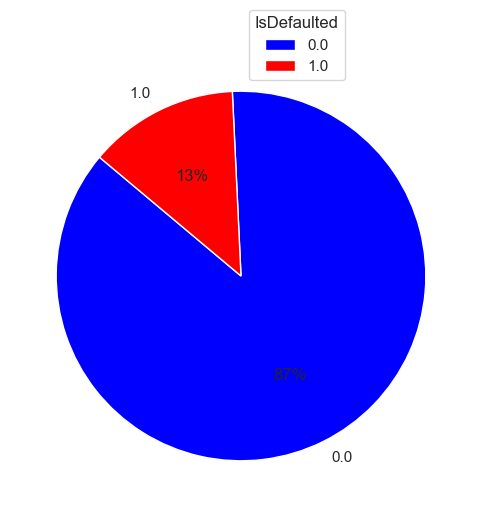

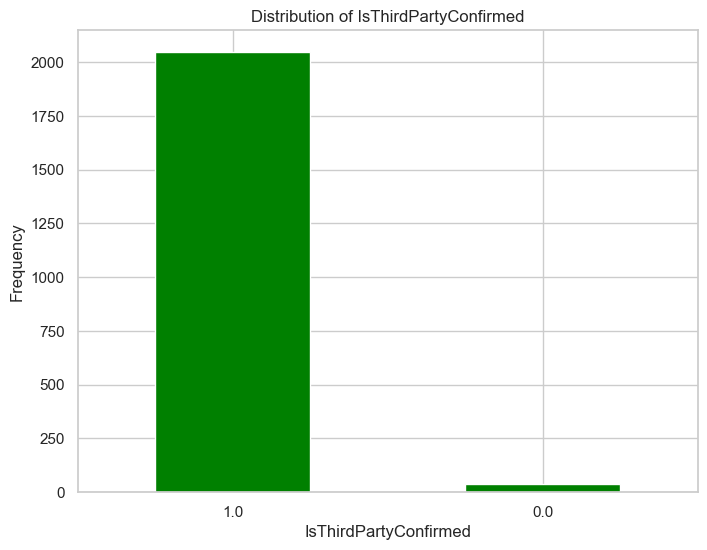

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
# df = pd.read_csv('your_data.csv')
# Custom color palette
custom_palette = sns.color_palette("Set2")
#count_palette = sns.color_palette("")
box_palette = sns.color_palette("Set2")


# Target Distribution (Univariate)
data_to_plot = data['IsDefaulted'].value_counts().reset_index()
data_to_plot.columns = ['IsDefaulted', 'Count']

# Define the colors: red for Defaulted, blue for Not Defaulted
colors = ['red', 'blue'] if data_to_plot['IsDefaulted'][0] == 1 else ['blue', 'red']

# Create the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    data_to_plot['Count'],
    labels=data_to_plot['IsDefaulted'],
    autopct='%.f%%',
    startangle=140,
    colors=colors  # Add the color palette
)

# Add legend
plt.legend(
    wedges,
    data_to_plot['IsDefaulted'],
    title="IsDefaulted",
    loc="center left",
    bbox_to_anchor=(0.5, 0.5, 0.5, 1)
)
plt.savefig('Target Distribution.png')
plt.show()

#


# Create a bar chart for IsThirdPartyConfirmed
plt.figure(figsize=(8,6))
data['IsThirdPartyConfirmed'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of IsThirdPartyConfirmed')
plt.xlabel('IsThirdPartyConfirmed')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig('IsThirdPartyConfirmed Distribution.png')
plt.show()




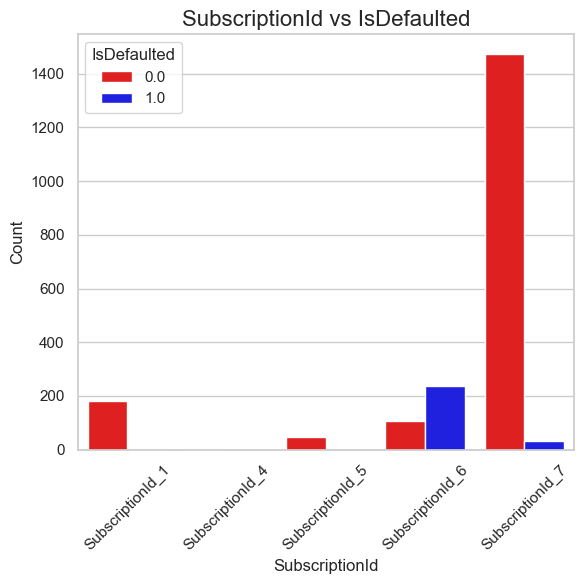

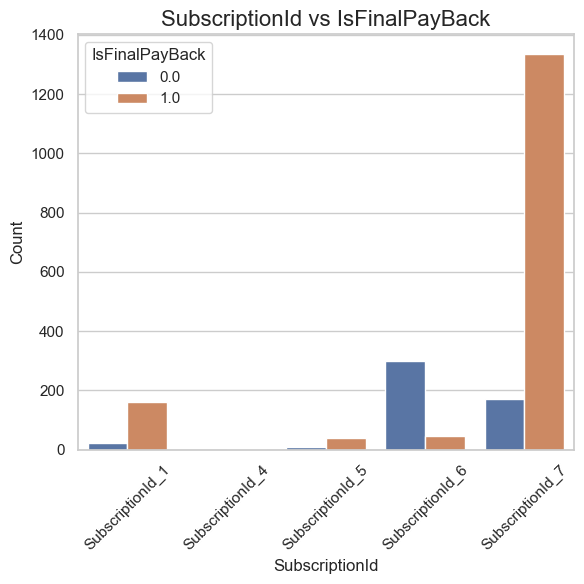

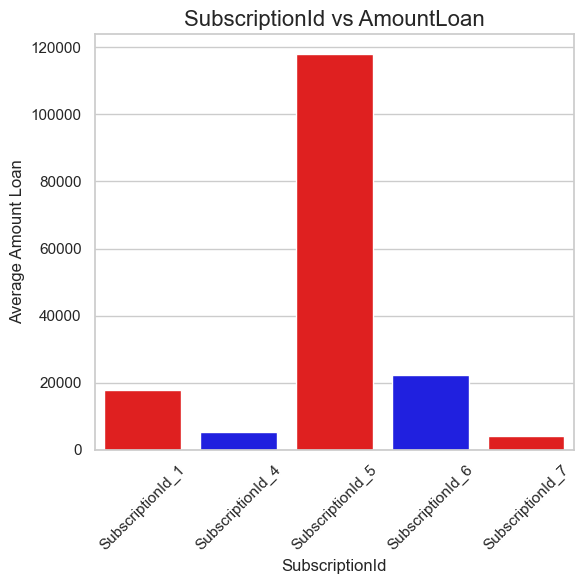

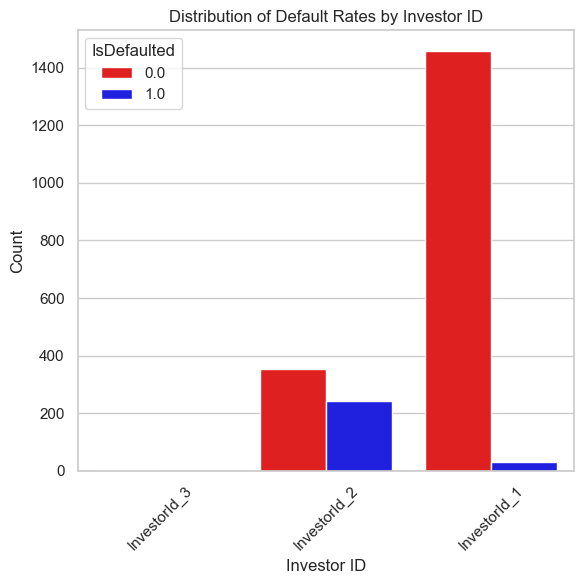

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Convert SubscriptionId to categorical if necessary
data['SubscriptionId'] = data['SubscriptionId'].astype('category')

# Set style for the plots
sns.set(style="whitegrid")

# 1. SubscriptionId vs IsDefaulted (Hue: IsDefaulted)
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='SubscriptionId', hue='IsDefaulted', palette=['red','blue'])
plt.title('SubscriptionId vs IsDefaulted', fontsize=16)
plt.xlabel('SubscriptionId', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('SubscriptionId_vs_IsDefaulted.png')
plt.show()

# 2. SubscriptionId vs IsFinalPayBack (Hue: IsFinalPayBack)
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='SubscriptionId', hue='IsFinalPayBack', palette='deep')
plt.title('SubscriptionId vs IsFinalPayBack', fontsize=16)
plt.xlabel('SubscriptionId', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('SubscriptionId_vs_IsFinalPayBack.png')
plt.show()

# 3. SubscriptionId vs AmountLoan (Hue: SubscriptionId)
plt.figure(figsize=(6, 6))
sns.barplot(data=data, x='SubscriptionId', y='AmountLoan', palette=['red','blue'], ci=None)
plt.title('SubscriptionId vs AmountLoan', fontsize=16)
plt.xlabel('SubscriptionId', fontsize=12)
plt.ylabel('Average Amount Loan', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('SubscriptionId_vs_AmountLoan.png')
plt.show()

# Create the plot
plt.figure(figsize=(6,6))
sns.countplot(data=data, x='InvestorId', hue='IsDefaulted', palette=['red','blue'])
plt.title('Distribution of Default Rates by Investor ID')
plt.xlabel('Investor ID')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Save the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('InvestorId_vs_IsDefaulted.png')
plt.show()



## Model Training

In [9]:
# Encoding categorical variables if any exist
# Assuming 'ProductCategory' is a categorical feature
data = pd.get_dummies(data, columns=['ProductCategory','SubscriptionId','InvestorId'], drop_first=True,dtype='float')


# Scale features using StandardScaler
from sklearn.preprocessing import StandardScaler

# Selecting the features to scale (e.g., 'AmountLoan', 'Value', 'Amount')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['AmountLoan', 'Value', 'Amount']])

# Adding scaled features back to the dataframe
data[['AmountLoan', 'Value', 'Amount']] = scaled_features

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0,1))

# Fit and transform the GracePeriod feature
data[['GracePeriod']] = scaler.fit_transform(data[['GracePeriod']])

# Display the first 110 rows of the updated DataFrame
data.head(110)


,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,CurrencyCode,CountryCode,ProviderId,ProductId,...,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,SubscriptionId_SubscriptionId_4,SubscriptionId_SubscriptionId_5,SubscriptionId_SubscriptionId_6,SubscriptionId_SubscriptionId_7,InvestorId_InvestorId_2,InvestorId_InvestorId_3
15,CustomerId_233,2018-10-22 16:04:25,-0.313395,0.312607,TransactionId_2632,BatchId_775,UGX,256,ProviderId_1,ProductId_7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16,CustomerId_27,2018-10-22 17:24:59,-0.339301,0.338510,TransactionId_2209,BatchId_2078,UGX,256,ProviderId_1,ProductId_3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17,CustomerId_305,2018-10-23 13:12:23,-0.342539,0.341747,TransactionId_1297,BatchId_2016,UGX,256,ProviderId_1,ProductId_7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,CustomerId_27,2018-10-23 15:20:58,-0.339301,0.338510,TransactionId_1367,BatchId_1675,UGX,256,ProviderId_1,ProductId_7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,CustomerId_27,2018-10-23 15:31:27,-0.342539,0.341747,TransactionId_871,BatchId_2449,UGX,256,ProviderId_1,ProductId_7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,CustomerId_233,2018-11-20 14:49:09,-0.332824,0.332034,TransactionId_2565,BatchId_937,UGX,256,ProviderId_1,ProductId_7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
121,CustomerId_193,2018-11-20 15:32:09,-0.339301,0.338510,TransactionId_744,BatchId_1670,UGX,256,ProviderId_1,ProductId_3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
122,CustomerId_193,2018-11-20 15:32:09,-0.339301,0.338510,TransactionId_744,BatchId_1670,UGX,256,ProviderId_1,ProductId_3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
123,CustomerId_405,2018-11-20 19:26:08,-0.332824,0.332034,TransactionId_1418,BatchId_565,UGX,256,ProviderId_1,ProductId_8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
columns_to_drop=['TransactionStatus','IssuedDateLoan','TransactionStartTime','DueDate','PaidOnDate','CustomerId','BatchId','CurrencyCode','Currency','ChannelId','CountryCode','ProviderId','ProductId','LoanId','LoanApplicationId','PayBackId','ThirdPartyId']
data=data.drop(columns=columns_to_drop)
display(data)

,Value,Amount,TransactionId,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,GracePeriod,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,SubscriptionId_SubscriptionId_4,SubscriptionId_SubscriptionId_5,SubscriptionId_SubscriptionId_6,SubscriptionId_SubscriptionId_7,InvestorId_InvestorId_2,InvestorId_InvestorId_3
15,-0.313395,0.312607,TransactionId_2632,-0.086779,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16,-0.339301,0.338510,TransactionId_2209,-0.086779,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17,-0.342539,0.341747,TransactionId_1297,-0.159970,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,-0.339301,0.338510,TransactionId_1367,-0.151760,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,-0.342539,0.341747,TransactionId_871,-0.159970,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,-0.332824,0.332034,TransactionId_1185,-0.132296,1.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2096,-0.313395,0.312607,TransactionId_1824,-0.078448,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2097,-0.313395,0.312607,TransactionId_2507,-0.060651,1.0,1.0,0.0,0.204444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2098,-0.336062,0.335272,TransactionId_540,-0.141945,1.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
#Splitting Data into train and test data
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop(['IsDefaulted', 'TransactionId'], axis=1)
y = data['IsDefaulted']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming X_train and y_train are your features and target variables
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                               Feature    Importance
2                           AmountLoan  1.622236e-01
3                       IsFinalPayBack  1.593131e-01
0                                Value  1.544165e-01
1                               Amount  1.377955e-01
5                          GracePeriod  1.204285e-01
14     SubscriptionId_SubscriptionId_6  1.050973e-01
9               ProductCategory_retail  9.754348e-02
16             InvestorId_InvestorId_2  2.355032e-02
15     SubscriptionId_SubscriptionId_7  1.713058e-02
4                IsThirdPartyConfirmed  1.213006e-02
13     SubscriptionId_SubscriptionId_5  3.290676e-03
6         ProductCategory_data_bundles  3.182005e-03
11        ProductCategory_utility_bill  2.706705e-03
10                  ProductCategory_tv  1.108815e-03
8               ProductCategory_movies  8.055781e-05
17             InvestorId_InvestorId_3  2.271437e-06
12     SubscriptionId_SubscriptionId_4  2.408121e-09
7   ProductCategory_financial_services  0.0000

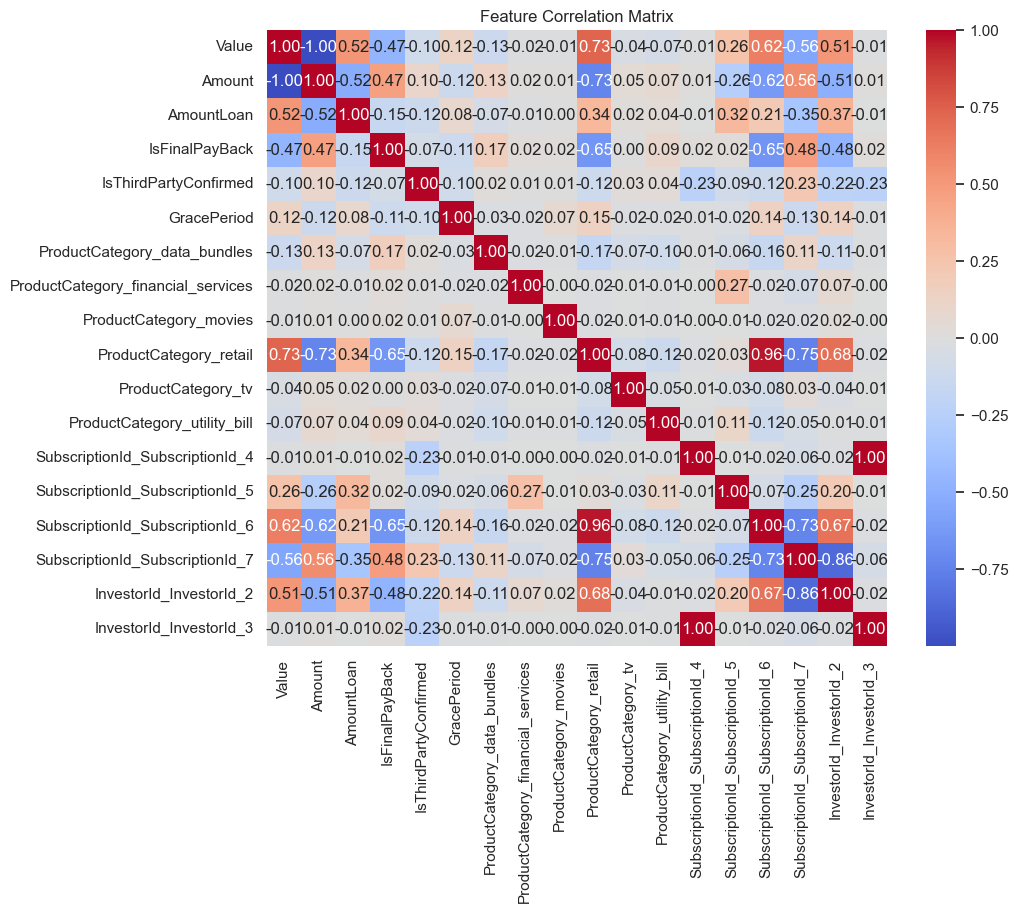

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Number of components you want
X_pca = pca.fit_transform(X_train)

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


Explained variance ratio: [0.70006922 0.10756309]


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
random_search.fit(X_train, y_train)

print(f'Best parameters: {random_search.best_params_}')
print(f'Best AUC score: {random_search.best_score_}')


Best parameters: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 30}
Best AUC score: 0.9863428353119819


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

print(f'Cross-validated AUC scores: {cv_scores}')
print(f'Mean AUC score: {cv_scores.mean()}')


Cross-validated AUC scores: [0.99042676 0.98673587 0.98039216 0.99284366 0.96678241]
Mean AUC score: 0.9834361711113442


In [17]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

skf = StratifiedKFold(n_splits=5)
auc_scores = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
    model.fit(X_train_fold, y_train_fold)
    y_pred_prob = model.predict_proba(X_test_fold)[:, 1]
    auc = roc_auc_score(y_test_fold, y_pred_prob)
    auc_scores.append(auc)

print(f'Stratified K-Fold AUC scores: {auc_scores}')
print(f'Mean AUC score: {np.mean(auc_scores)}')


Stratified K-Fold AUC scores: [0.9838908112264514, 0.9864282968089196, 0.972971933871588, 0.9679144385026739, 0.9809413580246913]
Mean AUC score: 0.9784293676868648


In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
import joblib  # Import joblib for saving the model

# Generate some synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=16, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Fit and transform training data
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for AUC
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Save results
    results[name] = {"Accuracy": accuracy, "AUC": auc}
    
    # Print metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print("------------------------")

# Optionally, save the best model
best_model_name = max(results, key=lambda k: results[k]['AUC'])
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.pkl')  # Save the best model to a file


Model: Logistic Regression
Accuracy: 0.8600
AUC: 0.9322
------------------------
Model: Random Forest
Accuracy: 0.8667
AUC: 0.9312
------------------------
Model: Gradient Boosting
Accuracy: 0.8700
AUC: 0.9210
------------------------
Model: Support Vector Machine
Accuracy: 0.8567
AUC: 0.9263
------------------------


['best_model.pkl']